This notebook runs stage 2 and 3 of the pipeline of the simulated NIRSpec IFU data of a brown dwarf on this website https://www.stsci.edu/jwst/science-planning/proposal-planning-toolbox/simulated-data 

The data you are reducing needs to be in a directory called "data/"
The outputs of the pipeline stages are stored in code created directories "stage1_dir/", "stage2_dir/", and "stage3_dir/". A stage1 directory is created but not used. Its a leftover from my miri code

In [9]:
from astropy.io import fits
import glob, os
from subprocess import call
from astropy.io import fits
import time

# jwst
import jwst
from jwst.pipeline import Detector1Pipeline, Spec2Pipeline, Spec3Pipeline
from jwst.cube_build import cube_build_step
from jwst import datamodels
import matplotlib.pyplot as plt
import numpy as n

checking which version of the jwst pipeline we are using

In [10]:
# Print out what pipeline version we're using
print('JWST pipeline version',jwst.__version__)

JWST pipeline version 1.5.4.dev4+g7aaf47d4


Looking for and creating directories to store the reduced data

In [11]:
cache_dir = './'

det1_dir = 'stage1_dir/' # Detector1 pipeline outputs will go here
spec2_dir = 'stage2_dir/' # Spec2 pipeline outputs will go here
spec3_dir = 'stage3_dir/' # Spec3 pipeline outputs will go here

# We need to check that the desired output directories exist, and if not create them
if not os.path.exists(det1_dir):
    os.makedirs(det1_dir)
if not os.path.exists(spec2_dir):
    os.makedirs(spec2_dir)
if not os.path.exists(spec3_dir):
    os.makedirs(spec3_dir)

This cell changes the file headers of the simulated stage2 cal files to change the simulated data source identification from extended source to point source. It is commented out for now because I'm not sure if I have to change the headers of all the files

In [12]:
#rate_files = glob.glob('data/*cal*fits')
#print(rate_files)

# Simulated data doesn't have the right keywords to tell the pipeline what kind of data is being processed.
# Overwrite rate file header info to specify that these are point sources.
#for ii in range(0,len(rate_files)):
#    hdu=fits.open(rate_files[ii])
#    hdu[1].header['SRCTYPE']='POINT'
#    hdu.writeto(rate_files[ii],overwrite=True)
#    hdu.close()

Running stage 2 of the jwst pipeline on the modified NRS fits files. The json file lists the relevant fits files hosted in the data directory to run the pipeline stage on

In [13]:
# This step uses stage 1 data, but for the brown dwarf simulated data from STScI box it does run on the stage 2a
# data (modified.fits files). The l2_asn.json file should come with the simulated data. Running this step then using
# these data products for stage 3 can cause some artifacts in the flux, but we believe that is due to the simulated
# data products not being exactlty stage 1.
# Create an instance of the pipeline class

spec2 = Spec2Pipeline()
# Set some parameters that pertain to the entire pipeline
spec2.save_results = True
spec2.output_dir = spec2_dir
spec2.flat_field.skip = True # it was recommended in some of the readme files for the simulated data to skip this step
#spec2.master_background.skip = True # it was recommended in some of the readme files for the simulated data to skip this step
# Here are some parameters that pertain to some of the individual steps, this step is commented out because it does not apply at this stage of the pipeline now
# spec2.extract_2d.mmag_extract = 20 # Minimum magnitude of objects to extract for WFSS data
# spec2.extract_1d.bkg_fit = 'poly' # Fit a polynomial to the background values for each column or row, not a big effect for nirspec data but can be used
# Call the run() method
result = spec2.run('data/l2_asn.json')

2022-06-22 11:43:26,438 - stpipe.Spec2Pipeline - INFO - Spec2Pipeline instance created.
2022-06-22 11:43:26,440 - stpipe.Spec2Pipeline.bkg_subtract - INFO - BackgroundStep instance created.
2022-06-22 11:43:26,442 - stpipe.Spec2Pipeline.assign_wcs - INFO - AssignWcsStep instance created.
2022-06-22 11:43:26,444 - stpipe.Spec2Pipeline.imprint_subtract - INFO - ImprintStep instance created.
2022-06-22 11:43:26,446 - stpipe.Spec2Pipeline.msa_flagging - INFO - MSAFlagOpenStep instance created.
2022-06-22 11:43:26,448 - stpipe.Spec2Pipeline.extract_2d - INFO - Extract2dStep instance created.
2022-06-22 11:43:26,453 - stpipe.Spec2Pipeline.master_background_mos - INFO - MasterBackgroundMosStep instance created.
2022-06-22 11:43:26,455 - stpipe.Spec2Pipeline.master_background_mos.flat_field - INFO - FlatFieldStep instance created.
2022-06-22 11:43:26,457 - stpipe.Spec2Pipeline.master_background_mos.pathloss - INFO - PathLossStep instance created.
2022-06-22 11:43:26,459 - stpipe.Spec2Pipeline.

Getting calibrated images files produced by the pipeline from the stage 2 directory. The commented code changes the fits file source type to a point source. It is commented now because it makes the flux really large. This step was necessary for miri data.

In [14]:
### Calling in the calibrated detector images produced by running the stage 2 pipeline on the modified NRS fits files
cal_files = glob.glob('stage2_dir/*cal*fits')
print(cal_files)

## Simulated data doesn't have the right keywords to tell the pipeline what kind of data is being processed.
# Overwrite rate file header info to specify that these are point sources.
#for ii in range(0,len(cal_files)):
#    hdu=fits.open(rate_files[ii])
#    hdu[1].header['SRCTYPE']='POINT'
#    hdu.writeto(rate_files[ii],overwrite=True)
#    hdu.close()

['stage2_dir/NRS00001-S1S2-F290LP-G395H-01_1_492_SE_2021-10-30T12h15m00_noflat_cal.fits', 'stage2_dir/NRS00001-S1S2-F290LP-G395H-01_1_491_SE_2021-10-30T12h15m00_noflat_cal.fits', 'stage2_dir/NRS00001-S1S2-F290LP-G395H-04_1_492_SE_2021-10-30T12h15m00_noflat_cal.fits', 'stage2_dir/NRS00001-S1S2-F290LP-G395H-04_1_491_SE_2021-10-30T12h15m00_noflat_cal.fits', 'stage2_dir/NRS00001-S1S2-F290LP-G395H-03_1_492_SE_2021-10-30T12h15m00_noflat_cal.fits', 'stage2_dir/NRS00001-S1S2-F290LP-G395H-03_1_491_SE_2021-10-30T12h15m00_noflat_cal.fits', 'stage2_dir/NRS00001-S1S2-F290LP-G395H-02_1_492_SE_2021-10-30T12h15m00_noflat_cal.fits', 'stage2_dir/NRS00001-S1S2-F290LP-G395H-02_1_491_SE_2021-10-30T12h15m00_noflat_cal.fits']


This cell creates a stage 3 json file to run the stage2 data through the stage3 pipeline

In [15]:
## create association file for dithered data. Make a json file for each dither set.
call(["asn_from_list", "-o","l3_asn.json"] + cal_files + ["--product-name", "dither"])

0

running the stage 3 pipeline

In [16]:
# This initial setup is just to make sure that we get the latest parameter reference files
# pulled in for our files.  This is a temporary workaround to get around an issue with
# how this pipeline calling method works.
crds_config = Spec3Pipeline.get_config_from_reference('l3_asn.json')# The exact asn file used doesn't matter
spec3 = Spec3Pipeline.from_config_section(crds_config)
    
spec3.output_dir = spec3_dir
spec3.save_results = True

spec3.master_background.skip = True # Computes and subtracts a master background signal
spec3.outlier_detection.skip = True # Identifies and flags any pixels with values that produce outliers in overlapping regions of cube space #True skip
spec3.mrs_imatch.skip = False # Ensure that there are no jumps in the background between individual exposures
spec3.cube_build.skip = False # Build the composite data cubes
spec3.extract_1d.skip = False # Extract 1d spectra from the composite data cubes

spec3('l3_asn.json')

2022-06-22 12:40:58,108 - stpipe.Spec3Pipeline - INFO - Spec3Pipeline instance created.
2022-06-22 12:40:58,109 - stpipe.Spec3Pipeline.assign_mtwcs - INFO - AssignMTWcsStep instance created.
2022-06-22 12:40:58,111 - stpipe.Spec3Pipeline.master_background - INFO - MasterBackgroundStep instance created.
2022-06-22 12:40:58,112 - stpipe.Spec3Pipeline.mrs_imatch - INFO - MRSIMatchStep instance created.
2022-06-22 12:40:58,115 - stpipe.Spec3Pipeline.outlier_detection - INFO - OutlierDetectionStep instance created.
2022-06-22 12:40:58,119 - stpipe.Spec3Pipeline.resample_spec - INFO - ResampleSpecStep instance created.
2022-06-22 12:40:58,122 - stpipe.Spec3Pipeline.cube_build - INFO - CubeBuildStep instance created.
2022-06-22 12:40:58,126 - stpipe.Spec3Pipeline.extract_1d - INFO - Extract1dStep instance created.
2022-06-22 12:40:58,127 - stpipe.Spec3Pipeline.photom - INFO - PhotomStep instance created.
2022-06-22 12:40:58,129 - stpipe.Spec3Pipeline.combine_1d - INFO - Combine1dStep instance

Plotting and comparing the reduction from this notebook to the original simulated data files.

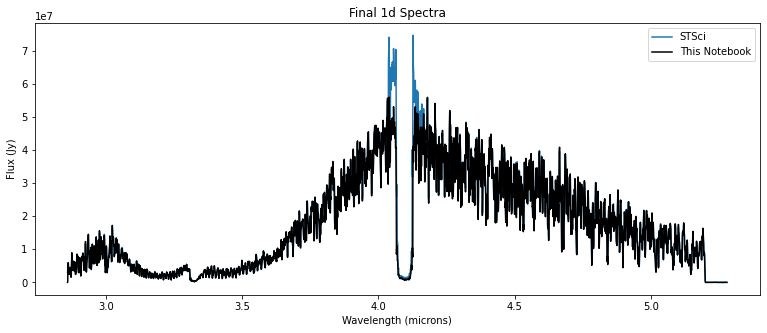

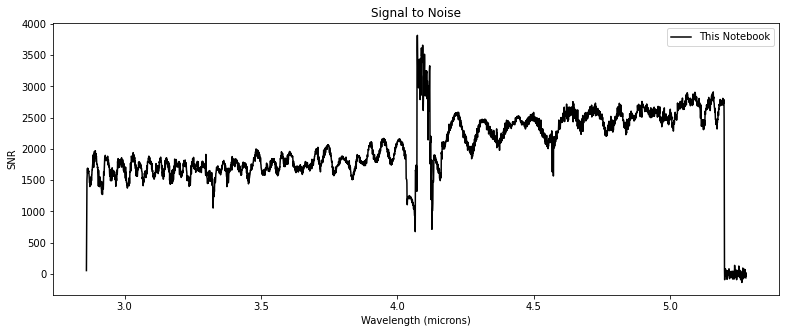

In [17]:
# Getting data and plotting the 1d spectra simulated and reduced by STSci
data = fits.open('data/NRS00001-BrownDwarf-F290LP-G395H_comb_1234_noutlier_g395h-f290lp_x1d.fits')
spectrum_info = data[1].data

wavelength = spectrum_info['WAVELENGTH']
flux = spectrum_info['FLUX'] #jy
#flux_error = spectrum_info['FLUX_ERROR'] #jy

# Getting data 1d spectra reduced by this notebook
data2 = fits.open('stage3_dir/dither_g395h-f290lp_x1d.fits')
spectrum_info2 = data2[1].data


wavelength2 = spectrum_info2['WAVELENGTH']
flux2 = spectrum_info2['FLUX'] #Jy
flux_error2 = spectrum_info2['FLUX_ERROR'] #Jy

wavelength2 = spectrum_info2['WAVELENGTH']
flux2 = spectrum_info2['FLUX'] #Jy
flux_error2 = spectrum_info2['FLUX_ERROR'] #Jy


plt.figure(figsize = (13, 5))
plt.title('Final 1d Spectra')
plt.plot(wavelength, flux, label = 'STSci') #7e7
plt.plot(wavelength2, flux2, 'k-', label = 'This Notebook') #1.75e6
plt.ylabel('Flux (Jy)')
plt.xlabel('Wavelength (microns)')
plt.legend()

plt.figure(figsize = (13, 5))
plt.title('Signal to Noise')
#plt.plot(wavelength, flux, label = 'Brittany') #7e7
plt.plot(wavelength2, flux2/flux_error2, 'k-', label = 'This Notebook') #1.75e6
plt.ylabel('SNR')
plt.xlabel('Wavelength (microns)')
plt.legend()

